# Data Modeling and Analysis

This Notebook will model the data and gather insights. This will include:
- Data Exploration
- Data Visualization
- Conclusions


Notes to self:



## Import Data

In [169]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

## Sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## NLTK
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## WordCloud
from wordcloud import WordCloud

#Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [120]:
df = pd.read_csv('../3_ANALYSIS/data/processed_data.csv')

print(df.shape)
df.head()

(2963, 74)


,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.USMC,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
0,Army,This was a convo I had with one of my buddies ...,If you could create a new MRE based on a Fast ...,[],r/army,0.663463,-0.261143,-0.261143,0,1,...,0,1,0,0,0,0,0,0,23,5
1,Army,BLUF: how do you overcome imposter syndrome?\n...,how do you even Army?,[],r/army,-1.599996,-0.288827,-0.288827,0,1,...,0,1,0,0,0,0,0,0,23,5
2,Army,"Long story short, my estranged (soon to be ex)...",Command Directed No-Contact Order?,[],r/army,0.663463,-0.274985,-0.274985,0,1,...,0,1,0,0,0,0,0,0,23,5
3,Army,"\nMy husband is 35T, and just graduated AIT. W...",Anyone 35T?,[],r/army,-0.178754,-0.247301,-0.247301,0,1,...,0,1,0,0,0,0,0,0,22,5
4,Army,I could use some advice on going recruiting. I...,Thinking of going recruiter as brand new E5,[],r/army,0.663463,-0.274985,-0.274985,0,1,...,0,1,0,0,0,0,0,0,22,5


In [121]:
military_df = df[df['subreddit'].isin(['Army', 'USMC'])]

military_df.head()

,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.USMC,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
0,Army,This was a convo I had with one of my buddies ...,If you could create a new MRE based on a Fast ...,[],r/army,0.663463,-0.261143,-0.261143,0,1,...,0,1,0,0,0,0,0,0,23,5
1,Army,BLUF: how do you overcome imposter syndrome?\n...,how do you even Army?,[],r/army,-1.599996,-0.288827,-0.288827,0,1,...,0,1,0,0,0,0,0,0,23,5
2,Army,"Long story short, my estranged (soon to be ex)...",Command Directed No-Contact Order?,[],r/army,0.663463,-0.274985,-0.274985,0,1,...,0,1,0,0,0,0,0,0,23,5
3,Army,"\nMy husband is 35T, and just graduated AIT. W...",Anyone 35T?,[],r/army,-0.178754,-0.247301,-0.247301,0,1,...,0,1,0,0,0,0,0,0,22,5
4,Army,I could use some advice on going recruiting. I...,Thinking of going recruiter as brand new E5,[],r/army,0.663463,-0.274985,-0.274985,0,1,...,0,1,0,0,0,0,0,0,22,5


In [122]:
#Downloading NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [123]:
def preprocess_text(text):
    '''
    This function is performing text cleaning in order to prepare the text for NLP analysis.
    This includes:
    - Lowercasing
    - Removing special characters and digits
    - Tokenizing into words
    - Removing stopwords
    - Lemmatization
    
    Returns: Cleaned text
    
    '''
    # Lowercasing
    text = text.lower()
    # Remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words("english", "ascii"))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)


In [124]:
def prepare_data_for_nlp(df, text_column='selftext', target_column='subreddit'):
    ''' 
    This function is performing text preprocessing and vectorization for NLP analysis.
    
    Parameters:
    - df: dataframe
    - text_column: column containing text data
    - target_column: column containing target variable
    
    
    Returns: X_train_vect, X_test_vect, y_train, y_test, vectorizer
    '''
    # Preprocess text data
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(str(x)))

    # Split dataset into features and target variable
    X = df[text_column]
    y = df[target_column]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization - using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    return X_train_vect, X_test_vect, y_train, y_test, vectorizer

In [125]:
X_train, X_test, y_train, y_test, vectorizer = prepare_data_for_nlp(military_df)

## Reviewing Aggregate Word Cloud

In [126]:
tdidf_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
print(tdidf_df)

       _a  _flu  _pubs  _req  _ss  aaffj  aaslt   ability      able  abn  ...  \
0     0.0   0.0    0.0   0.0  0.0    0.0    0.0  0.000000  0.000000  0.0  ...   
1     0.0   0.0    0.0   0.0  0.0    0.0    0.0  0.000000  0.000000  0.0  ...   
2     0.0   0.0    0.0   0.0  0.0    0.0    0.0  0.000000  0.107868  0.0  ...   
3     0.0   0.0    0.0   0.0  0.0    0.0    0.0  0.000000  0.000000  0.0  ...   
4     0.0   0.0    0.0   0.0  0.0    0.0    0.0  0.000000  0.000000  0.0  ...   
...   ...   ...    ...   ...  ...    ...    ...       ...       ...  ...  ...   
1199  0.0   0.0    0.0   0.0  0.0    0.0    0.0  0.000000  0.000000  0.0  ...   
1200  0.0   0.0    0.0   0.0  0.0    0.0    0.0  0.000000  0.000000  0.0  ...   
1201  0.0   0.0    0.0   0.0  0.0    0.0    0.0  0.063096  0.000000  0.0  ...   
1202  0.0   0.0    0.0   0.0  0.0    0.0    0.0  0.000000  0.000000  0.0  ...   
1203  0.0   0.0    0.0   0.0  0.0    0.0    0.0  0.000000  0.000000  0.0  ...   

      ziprecruiter  zmu  zm

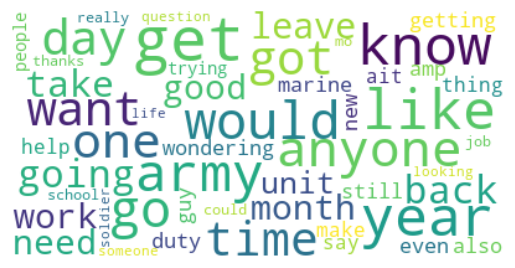

In [127]:
# Sum the TF-IDF scores for each word
word_frequencies = tdidf_df.sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=50, random_state=42).generate_from_frequencies(word_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Training for Logistical Regression Model

In [128]:
# Initialize the model
lrg = LogisticRegression()

# Train the model
lrg.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

        Army       0.76      1.00      0.86       220
        USMC       1.00      0.13      0.24        82

    accuracy                           0.76       302
   macro avg       0.88      0.57      0.55       302
weighted avg       0.82      0.76      0.69       302



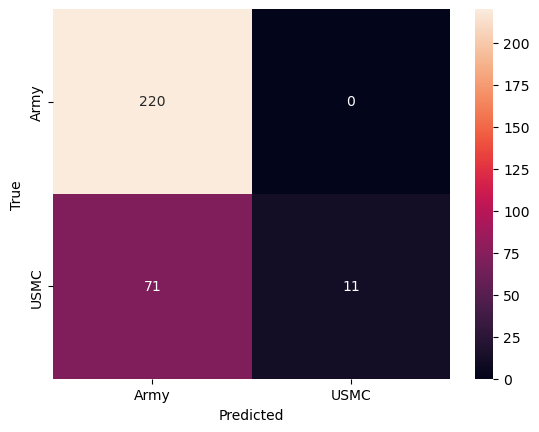

In [129]:
# Make predictions on the test set
y_pred_lr = lrg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr)) #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Plot confusion matrix
cm_lrg = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lrg, 
            annot=True,
            fmt='d',
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'],)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [130]:
# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2', 'elasticnet', None],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'n_jobs': [-1]}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model = grid_search.best_estimator_
y_pred_best_lr = best_model.predict(X_test)


/Users/kyerafrancis/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kyerafrancis/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

C                       0.1
class_weight       balanced
max_iter                100
multi_class     multinomial
n_jobs                   -1
penalty                  l2
random_state             42
solver            newton-cg
dtype: object

              precision    recall  f1-score   support

        Army       0.86      0.84      0.85       220
        USMC       0.60      0.65      0.62        82

    accuracy                           0.78       302
   macro avg       0.73      0.74      0.73       302
weighted avg       0.79      0.78      0.79       302



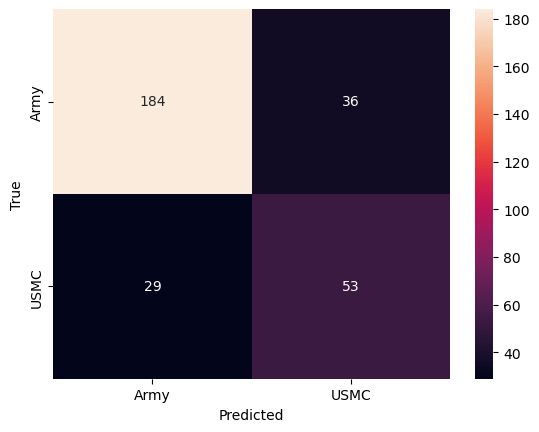

In [131]:
# Print best parameters
print(pd.Series(grid_search.best_params_))
print()
# Print classification report
print(classification_report(y_test, y_pred_best_lr))

# Plot confusion matrix
cm_lrg_best = confusion_matrix(y_test, y_pred_best_lr)
sns.heatmap(cm_lrg_best,
            annot=True,
            fmt='d', 
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [132]:
# Variables 
feature_names = vectorizer.get_feature_names_out()
coefficients = lrg.coef_[0] #Becuase this is a binary classification problem, there are only 2 classes. Therefore, we only need to look at the first row of coefficients.

for _, class_label in enumerate(lrg.classes_): #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    sorted_indices = np.argsort(coefficients)

    top_positive_words = [feature_names[i] for i in sorted_indices[-20:]]
    top_negative_words = [feature_names[i] for i in sorted_indices[:20]]

    print(f"Class: {class_label}")
    print("Top Positive Influential Words:", top_positive_words)
    print("Top Negative Influential Words:", top_negative_words)
    print()

Class: Army
Top Positive Influential Words: ['cpl', 'package', 'fleet', 'www', 'worst', 'yall', 'base', 'speak', 'semper', 'order', 'com', 'usmc', 'think', 'one', 'got', 'issued', 'guy', 'devil', 'corp', 'marine']
Top Negative Influential Words: ['army', 'ait', 'soldier', 'fort', 'job', 'year', 'station', 'basic', 'get', 'mo', 'unit', 'take', 'also', 'hbl', 'guard', 'date', 'issue', 'week', 'airborne', 'need']

Class: USMC
Top Positive Influential Words: ['cpl', 'package', 'fleet', 'www', 'worst', 'yall', 'base', 'speak', 'semper', 'order', 'com', 'usmc', 'think', 'one', 'got', 'issued', 'guy', 'devil', 'corp', 'marine']
Top Negative Influential Words: ['army', 'ait', 'soldier', 'fort', 'job', 'year', 'station', 'basic', 'get', 'mo', 'unit', 'take', 'also', 'hbl', 'guard', 'date', 'issue', 'week', 'airborne', 'need']



### Word Clouds for Positive and Negative Posts

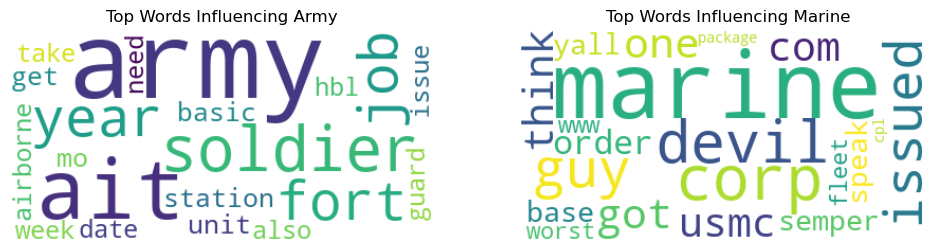

In [133]:
# For Class A (Positive Coefficients)
top_words_marine = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[-20:]}

# For Class B (Negative Coefficients)
top_words_army = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[:20]}

# Word Cloud for Class A
wordcloud_army = WordCloud(background_color='white').generate_from_frequencies(top_words_army)

# Word Cloud for Class B
wordcloud_marine = WordCloud(background_color='white').generate_from_frequencies(top_words_marine)

# Display Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_army, interpolation='bilinear')
plt.title('Top Words Influencing Army')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_marine, interpolation='bilinear')
plt.title('Top Words Influencing Marine')
plt.axis("off")

plt.show()

## Training for Naive Bayes Regression Model

In [134]:
# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

        Army       0.73      1.00      0.84       220
        USMC       1.00      0.01      0.02        82

    accuracy                           0.73       302
   macro avg       0.87      0.51      0.43       302
weighted avg       0.80      0.73      0.62       302



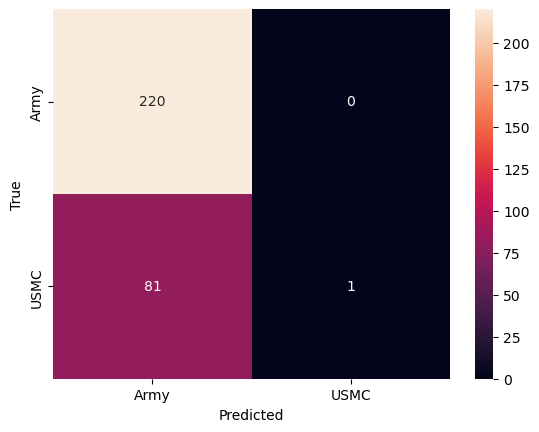

In [135]:
# Predict on the test set
y_pred_mnb = mnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_mnb))

# Plot the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb,
            annot=True,
            fmt='d',
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [136]:
# Define a parameter grid for GridSearch
param_grid_mnb = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]],
    }

# Initialize and perform the grid search
grid_search_mnb = GridSearchCV(MultinomialNB(), param_grid = param_grid_mnb, cv=5)
grid_search_mnb.fit(X_train, y_train)



# Re-evaluate using the best model
best_model = grid_search_mnb.best_estimator_
y_pred_best_mnb = best_model.predict(X_test)


Best Parameters:  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

        Army       0.78      0.96      0.86       220
        USMC       0.74      0.28      0.41        82

    accuracy                           0.78       302
   macro avg       0.76      0.62      0.64       302
weighted avg       0.77      0.78      0.74       302



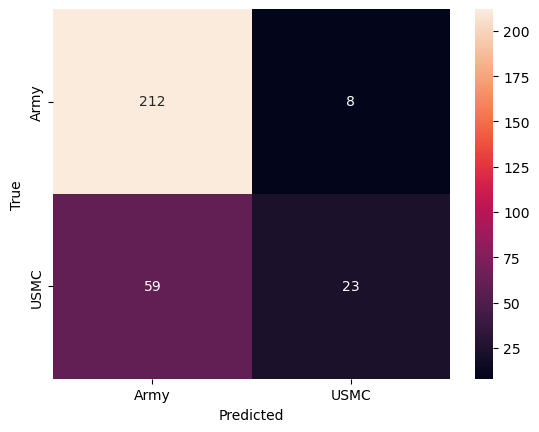

In [137]:
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

#Print classification report
print(classification_report(y_test, y_pred_best_mnb))

# Plot the confusion matrix
cm_mnb_best = confusion_matrix(y_test, y_pred_best_mnb)
sns.heatmap(cm_mnb_best,
            annot=True,
            fmt='d',
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [138]:
# Variables 

log_prob = mnb.feature_log_prob_ #There are no coefficients in Multinomial Naive Bayes, instead we have log probabilities

for _, class_label in enumerate(mnb.classes_):
    class_log_probabilities = log_prob[_]
    sorted_indices = np.argsort(class_log_probabilities)

    top_words = [feature_names[i] for i in sorted_indices[-20:]]  # Top 20 words

    print(f"Class: {class_label}")
    print("Top Influential Words:", top_words)
    print()

Class: Army
Top Influential Words: ['ait', 'need', 'leave', 'unit', 'back', 'got', 'take', 'one', 'going', 'anyone', 'time', 'day', 'want', 'go', 'would', 'like', 'know', 'year', 'army', 'get']

Class: USMC
Top Influential Words: ['order', 'think', 'day', 'want', 'corp', 'back', 'year', 'good', 'work', 'would', 'go', 'amp', 'guy', 'know', 'get', 'anyone', 'got', 'one', 'like', 'marine']



## Training for Random Forest Classifier Model

In [139]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

        Army       0.79      1.00      0.88       220
        USMC       0.96      0.29      0.45        82

    accuracy                           0.80       302
   macro avg       0.88      0.64      0.66       302
weighted avg       0.84      0.80      0.76       302



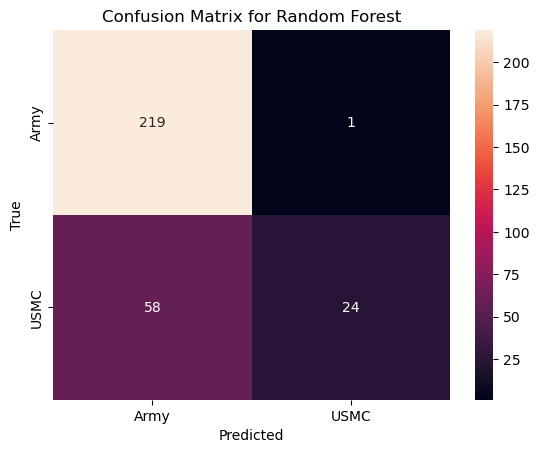

In [140]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [141]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features (Not separated by class)

top_features = [(feature_names[i], importances[i]) for i in indices]
print("Top Features and Words:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")

Top Features and Words:
worst: 0.0039589399444448494
good: 0.004044369527425884
take: 0.004114274565526259
soldier: 0.004193206062644246
speak: 0.004300916723128132
guy: 0.00448782398631261
issued: 0.004693682871939256
think: 0.00497141036730464
like: 0.005166963377490834
semper: 0.005423657695020001
com: 0.005738015231009722
ait: 0.005800476350107314
anyone: 0.006585401139910141
got: 0.007471246755273845
one: 0.008052477148800119
get: 0.008500680594329091
devil: 0.0097722897287483
corp: 0.010976778952666045
army: 0.01623144139485511
marine: 0.04509521527930431


In [142]:
# Define parameter grid for GridSearch
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)

max_depth              NaN
min_samples_leaf       1.0
min_samples_split     10.0
n_estimators         100.0
dtype: float64

              precision    recall  f1-score   support

        Army       0.79      1.00      0.88       220
        USMC       1.00      0.28      0.44        82

    accuracy                           0.80       302
   macro avg       0.89      0.64      0.66       302
weighted avg       0.85      0.80      0.76       302



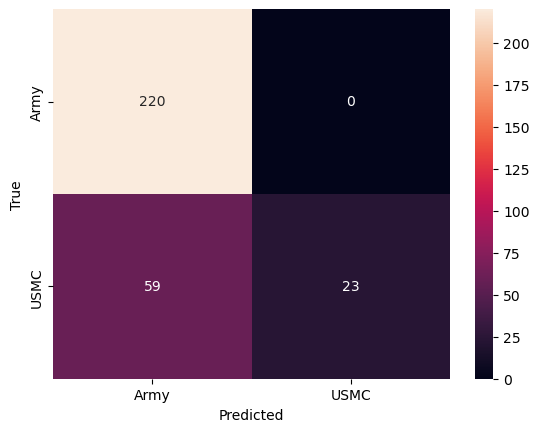

In [143]:
# Print best parameters
print(pd.Series(grid_search_rf.best_params_))
print()
# Print classification report
print(classification_report(y_test, y_pred_best_rf))

# Plot confusion matrix
cm_rf_best = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_rf_best,
            annot=True,
            fmt='d', 
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Training for KNN Model

In [144]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

        Army       0.73      1.00      0.84       220
        USMC       0.00      0.00      0.00        82

    accuracy                           0.73       302
   macro avg       0.36      0.50      0.42       302
weighted avg       0.53      0.73      0.61       302



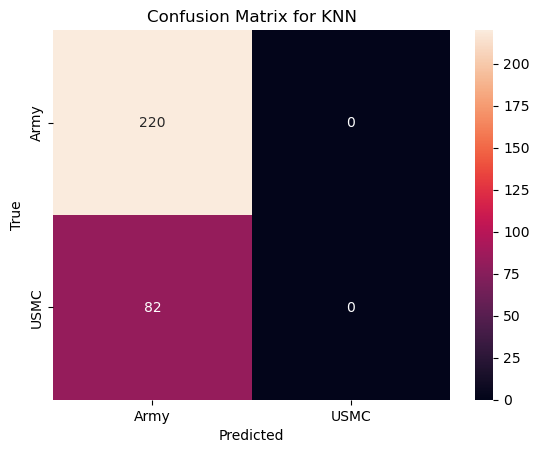

In [145]:
# Make predictions
y_pred_knn = knn.predict(X_test) 

# Print classification report
print(classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

As you can see if we process the KNN the same way as the other models, we get a very low accuracy score. This is because the KNN model is very sensitive to the scale of the data. We will need to scale the data before we can run the model.

In [146]:
# Scale the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN model with GridSearch for parameter tuning
knn_params = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_scaled = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_scaled, knn_params, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

# Best KNN model
best_knn = grid_search.best_estimator_

metric         euclidean
n_neighbors            1
weights          uniform
dtype: object

Classification Report:
              precision    recall  f1-score   support

        Army       0.83      0.92      0.87       220
        USMC       0.70      0.48      0.57        82

    accuracy                           0.80       302
   macro avg       0.76      0.70      0.72       302
weighted avg       0.79      0.80      0.79       302

Accuracy: 0.8013245033112583


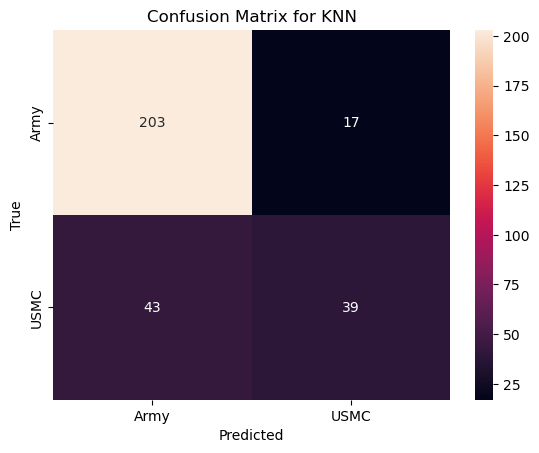

In [147]:
# Make predictions
y_pred_knn = best_knn.predict(X_test_scaled)

# Print best parameters
print(pd.Series(grid_search_knn.best_params_))
print()
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Training for Gradient Boosting Model

In [148]:
# Initialize and train the Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

              precision    recall  f1-score   support

        Army       0.81      0.98      0.88       220
        USMC       0.86      0.37      0.51        82

    accuracy                           0.81       302
   macro avg       0.83      0.67      0.70       302
weighted avg       0.82      0.81      0.78       302



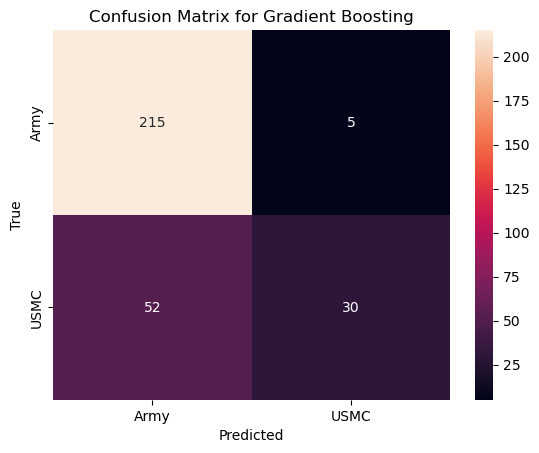

In [149]:
# Make predictions
y_pred_gb = gb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_gb))

# Confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'])
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [150]:
# Variables

importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[-20:]  # Top 20 features

top_features_gb = [(feature_names[i], importances_gb[i]) for i in indices_gb]
print("Top Features and Words for Gradient Boosting:")
for feature, importance in top_features_gb:
    print(f"{feature}: {importance}")

Top Features and Words for Gradient Boosting:
semper: 0.008739920897794313
cpl: 0.009266351414118724
october: 0.00927921151557117
hot: 0.01023130111435924
lejeune: 0.01031062878726238
take: 0.010313664754403474
naval: 0.01035572126677332
speak: 0.010566905136999667
one: 0.013298290158747355
anyone: 0.013478412681428244
issued: 0.01365759908793393
guy: 0.014195470623140298
pendleton: 0.014999280930071282
soldier: 0.016362679073958494
fleet: 0.018807928582643213
ait: 0.02055199071678737
com: 0.022350520085587296
devil: 0.03022143928607742
army: 0.12744696404298617
marine: 0.2404044407421832


In [151]:
# Define parameter grid for GridSearch
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize Grid Search
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model_gb = grid_search_gb.best_estimator_
y_pred_best_gb = best_model_gb.predict(X_test)

Best Parameters for Gradient Boosting:
learning_rate          0.01
max_depth              4.00
min_samples_leaf       2.00
min_samples_split      2.00
n_estimators         300.00
dtype: float64

Classification Report for Best Gradient Boosting Model:
              precision    recall  f1-score   support

        Army       0.80      1.00      0.88       220
        USMC       0.96      0.32      0.48        82

    accuracy                           0.81       302
   macro avg       0.88      0.66      0.68       302
weighted avg       0.84      0.81      0.77       302



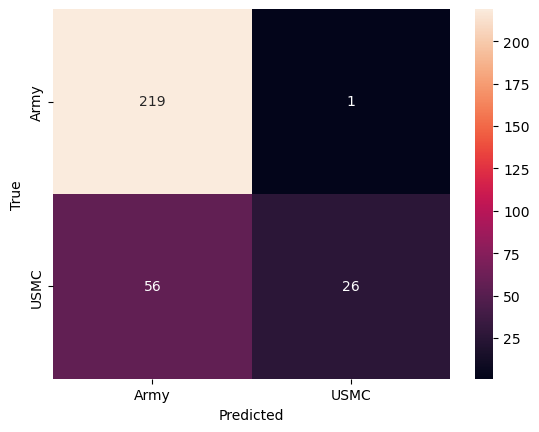

In [152]:
# Print best parameters
print("Best Parameters for Gradient Boosting:")
print(pd.Series(grid_search_gb.best_params_))
print()

# Print classification report for the best model
print("Classification Report for Best Gradient Boosting Model:")
print(classification_report(y_test, y_pred_best_gb))

# Plot confusion matrix for the best model
cm_gb_best = confusion_matrix(y_test, y_pred_best_gb)
sns.heatmap(cm_gb_best,
            annot=True,
            fmt='d', 
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Summary of Models

In [170]:
# Variables
today_date = datetime.now().strftime("%Y-%m-%d")

# Check if the CSV file exists
if os.path.exists("./data/model_performance_history_military.csv"):
    # Load the existing DataFrame
    model_comparison_df = pd.read_csv("./data/model_performance_history_military.csv")
else:
    # Initialize a new DataFrame if the file does not exist
    model_comparison_df = pd.DataFrame()

# Capture the best scores and parameters for each model
new_data = {
    "Model": ["Logistic Regression", "Multinomial Naive Bayes", "Random Forest", "KNN", "Gradient Boosting"],
    f"{today_date}_Score": [
        grid_search.best_score_,
        grid_search_mnb.best_score_,
        grid_search_rf.best_score_,
        grid_search_knn.best_score_,
        grid_search_gb.best_score_
    ],
    f"{today_date}_Params": [
        str(grid_search.best_params_),
        str(grid_search_mnb.best_params_),
        str(grid_search_rf.best_params_),
        str(grid_search_knn.best_params_),
        str(grid_search_gb.best_params_)
    ]
}

# Convert new data to DataFrame
new_data_df = pd.DataFrame(new_data)

# Update the existing DataFrame with the new data
model_comparison_df = pd.concat([model_comparison_df, new_data_df], axis=0)

# Sort the DataFrame by the highest best score for the current run
model_comparison_df = model_comparison_df.sort_values(by=f"{today_date}_Score", ascending=False)

# Save the DataFrame to a CSV file
model_comparison_df.to_csv("./data/model_performance_history_military.csv", index=False)

# Display the DataFrame
model_comparison_df


,Model,2024-01-05_Score,2024-01-05_Params
1,Multinomial Naive Bayes,0.798157,"{'alpha': 0.01, 'class_prior': [0.7, 0.3], 'fi..."
0,Logistic Regression,0.793223,"{'C': 0.1, 'class_weight': 'balanced', 'max_it..."
4,Gradient Boosting,0.791549,"{'learning_rate': 0.01, 'max_depth': 4, 'min_s..."
2,Random Forest,0.784893,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
3,KNN,0.731729,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
